In [ ]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
data = pd.read_excel("/content/datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [ ]:

train_len = 214
train_oc = data[["Ocupados"]][:train_len]
test_oc = data[["Ocupados"]][train_len:]

In [ ]:
month_dummies = pd.get_dummies(train_oc.index.month, drop_first=True).set_index(train_oc.index)

y = train_oc["Ocupados"]
train_oc["x"] = np.linspace(1, train_oc.shape[0], train_oc.shape[0])
train_oc["x2"] = train_oc["x"]**2
train_oc["x3"] = train_oc["x"]**3
X = sm.add_constant( pd.concat([train_oc[["x","x2", "x3"]],month_dummies],axis=1) )

season_pol3 = sm.OLS(y,X)
season_pol_3 = season_pol3.fit()
print(season_pol_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.41e-179
Time:                        01:07:05   Log-Likelihood:                -1370.3
No. Observations:                 214   AIC:                             2771.
Df Residuals:                     199   BIC:                             2821.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6975.3189     53.370    130.698      0.0

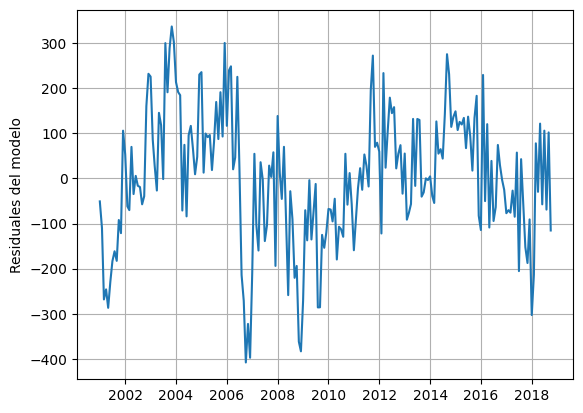

In [ ]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_3.resid)
plt.grid()

## **3. Autocorrelación**

In [ ]:
signo = season_pol_3.resid>0

In [ ]:
runstest_1samp(data[["Ocupados"]], correction=False)

(-14.190430951713576, 1.0501141198036143e-45)

In [ ]:
# prueba de Box-Pierce y la modificación de Ljung-Box
sm.stats.acorr_ljungbox(data[["Ocupados"]], lags=[1],
                        return_df=True,boxpierce=True ) # Se puede hacer para un solo lag.

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,213.848488,1.987331e-48,210.958644,8.486316e-48


Los residuos no pertenecen a un ruido blanco, es decir hay autocorrelación


In [ ]:
Resul_lb_bp = sm.stats.acorr_ljungbox(data[["Ocupados"]], lags=range(1,21),
                                      return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr',
                                'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr',
                                'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,213.848488,1.987331e-48,210.958644,8.486316e-48,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,421.882574,2.451111e-92,415.244368,6.773783e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,625.378784,3.172685e-135,614.157330,8.594402e-133,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,825.355742,2.471383e-177,808.729505,9.873368e-174,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,1021.698974,1.204937e-218,998.881735,1.049496e-213,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,1213.666388,5.275121e-259,1183.931404,1.437450e-252,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
7,1402.321425,1.214195e-298,1364.938264,1.488143e-290,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
8,1586.436188,0.000000e+00,1540.759569,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
9,1767.316037,0.000000e+00,1712.676902,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
10,1945.503650,0.000000e+00,1881.232753,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr


En la serie residual del modelo 4 si es muy contundente la decisión en los primeros 20 rezagos, es decir, los residuos del modelo con mejor MSE no parece comportarse como un ruido blanco, **Si presenta autocorrelación**.

### **4. Homoscedasticidad y Heteroscedasticidad**

In [ ]:
sm.stats.acorr_ljungbox((season_pol_3.resid-season_pol_3.resid.mean())**2, lags=range(1,20), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,59.739685,1.082711e-14,58.909967,1.650540e-14
2,80.985267,2.595809e-18,79.762113,4.784949e-18
3,86.936878,9.962101e-19,85.575955,1.952191e-18
4,87.088936,5.466024e-18,85.723789,1.065131e-17
5,87.821743,1.926292e-17,86.432847,3.768492e-17
6,87.871975,8.379474e-17,86.481219,1.628081e-16
7,88.823355,2.157713e-16,87.392958,4.240116e-16
8,88.824737,8.053139e-16,87.394276,1.570085e-15
9,89.809039,1.778220e-15,88.328452,3.522155e-15
10,90.591197,4.088547e-15,89.067156,8.198252e-15


Comportamiento Heterocedastico - hay evidencia suficiente para rechazar H0

## **5. Normalidad**

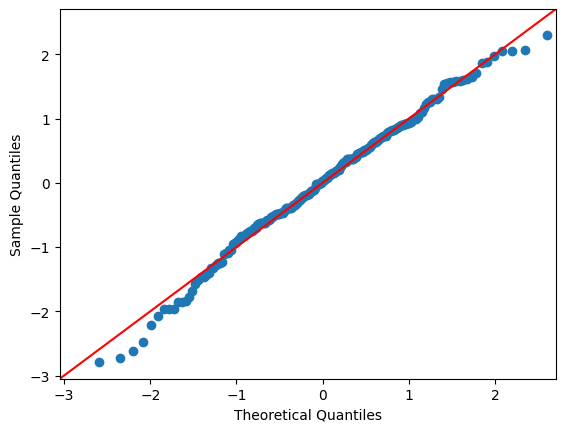

In [ ]:

sm.qqplot(season_pol_3.resid, line='45', fit=True)
plt.gca().get_lines()[0].set_color("red")
plt.show()

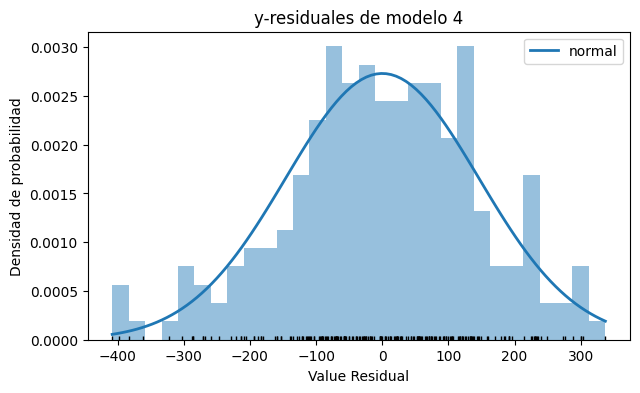

In [ ]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(season_pol_3.resid)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(season_pol_3.resid), max(season_pol_3.resid), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=season_pol_3.resid, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(season_pol_3.resid, np.full_like(season_pol_3.resid, 0.0), '|k', markeredgewidth=1)
ax.set_title('y-residuales de modelo 4')
ax.set_xlabel('Value Residual')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [ ]:
stats.shapiro(season_pol_3.resid)

ShapiroResult(statistic=0.9914204478263855, pvalue=0.24007807672023773)

In [ ]:
stats.jarque_bera(season_pol_3.resid)

SignificanceResult(statistic=2.3296441849220284, pvalue=0.31197816036244214)

No se puede rechazar HO por tanto pareciera que poseen los residuos un comportamiento normal.